# Other common physical Hamiltonians

In [9]:
from quantum_simulation_recipe.plot_config import *
from quantum_simulation_recipe.bounds import tight_bound
# from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d, Power_Law
from quantum_simulation_recipe.fermion import Hydrogen_Chain, hubbard_openfermion
from quantum_simulation_recipe.trotter import pf, expH
from observable_decay import Evolve_ob, Evolve_state
from qiskit.quantum_info import DensityMatrix, Statevector
from states import ghz_state, random_states
import numpy as np

from plot_data import read_dict
import os
import colorsys

good_color_cycle = ['#9467bdFF', '#2ca02cFF', '#d62728FF', '#1f77b4FF', '#ff7f0eFF', '#8c564bFF', '#e377c2FF', '#7f7f7fFF', '#bcbd22FF', '#17becfFF']
set_color_cycle(good_color_cycle)
set_fontsize(medium=MEDIUM_SIZE+16, large=LARGE_SIZE+12, linewidth=2.5)

mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['axes.grid'] = False
mpl.rcParams['legend.frameon'] = False

plt.rc('legend', fontsize=MEDIUM_SIZE+1) 
# plt.rc('xtick', labelsize=MEDIUM_SIZE)  # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE) 

# 'Helvetica'  sans-serif
# mpl.rcParams['font.family'] = 'Helvetica'  
mpl.rcParams['font.family'] = 'sans-serif'  
fig_dir, data_dir = './figs', './data'

In [7]:
Hydrogen_Chain(chain_length=5, bond_length=3)

# pstr: 444, ['IIIIIIIIII', 'ZIIIIIIIII', 'YZZZYIIIII', 'XZZZXIIIII', 'YZZZZZZZYI', 'XZZZZZZZXI', 'IZIIIIIIII', 'IYZZZYIIII', 'IXZZZXIIII', 'IYZZZZZZZY', 'IXZZZZZZZX', 'IIZIIIIIII', 'IIYZZZYIII', 'IIXZZZXIII', 'IIIZIIIIII', 'IIIYZZZYII', 'IIIXZZZXII', 'IIIIZIIIII', 'IIIIYZZZYI', 'IIIIXZZZXI', 'IIIIIZIIII', 'IIIIIYZZZY', 'IIIIIXZZZX', 'IIIIIIZIII', 'IIIIIIIZII', 'IIIIIIIIZI', 'IIIIIIIIIZ', 'ZZIIIIIIII', 'YIZZYIIIII', 'XIZZXIIIII', 'YIZZZZZZYI', 'XIZZZZZZXI', 'YXXYIIIIII', 'YYXXIIIIII', 'XXYYIIIIII', 'XYYXIIIIII', 'YXIXZZYIII', 'YYIYZZYIII', 'XXIXZZXIII', 'XYIYZZXIII', 'ZYZZZYIIII', 'ZXZZZXIIII', 'YXIIXYIIII', 'YYIIXXIIII', 'XXIIYYIIII', 'XYIIYXIIII', 'YXIIIXZZYI', 'YYIIIYZZYI', 'XXIIIXZZXI', 'XYIIIYZZXI', 'YXXZZZZYII', 'YYXZZZZXII', 'XXYZZZZYII', 'XYYZZZZXII', 'YXIIIIXYII', 'YYIIIIXXII', 'XXIIIIYYII', 'XYIIIIYXII', 'ZYZZZZZZZY', 'ZXZZZZZZZX', 'YXIIXZZZZY', 'YYIIXZZZZX', 'XXIIYZZZZY', 'XYIIYZZZZX', 'YXIIIIIIXY', 'YYIIIIIIXX', 'XXIIIIIIYY', 'XYIIIIIIYX', 'ZIZIIIIIII', 'ZIYZZZYIII', 'ZIXZZ

idx: 0
c1=207.46174172916298, c2=107.49992315343519
naive_alg_bnd: 0.00272095524276959


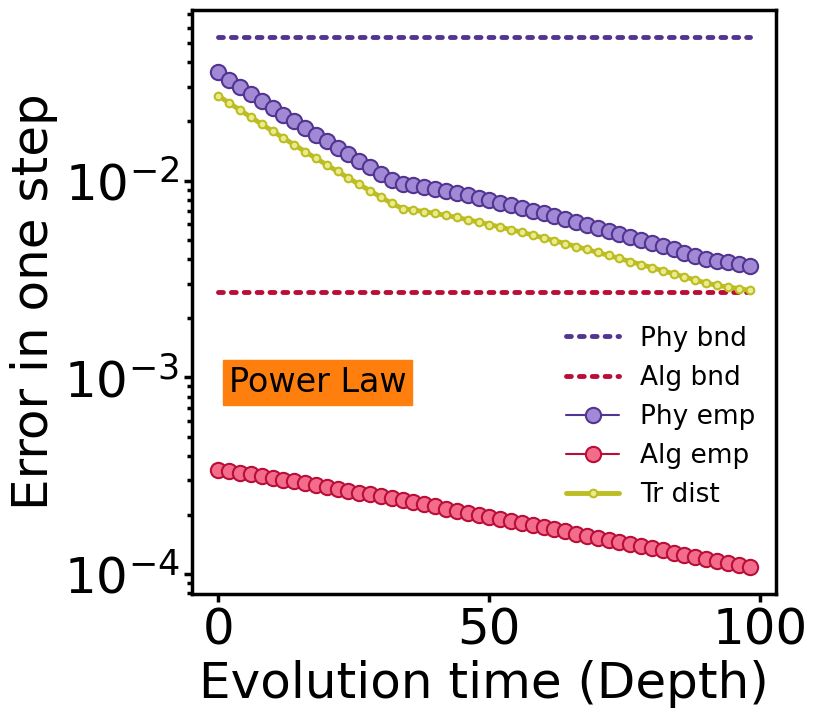

In [92]:
# model = 'nnh'
# model = 'fermi_hubbard'
# model = 'hydrogen_chain'
model = 'power_law'
prefix = 'data'
dirname = model
# plot_idx = [{'type': 'fermi_hubbard', 'filetime': 'Y2024M10D18_h20m15s14', 'tag': 'Fermi Hubbard'},
#             {'type': 'hydrogen_chain', 'filetime': 'Y2024M10D18_h20m22s38', 'tag': 'Hydrogen Chain'},
#             {'type': 'power_law', 'filetime': 'Y2024M10D18_h20m16s48', 'tag': 'Power Law'}]

# filetimes = ['Y2024M10D18_h20m15s14']
# filetimes = ['Y2024M10D18_h20m22s38']
filetimes = ['Y2024M10D18_h20m16s48']
width_0 = 1.5
fig, ax = plt.subplots(1, 1, figsize=(9, 8))

gc = GradColors(10)
cm_phy, cm_alg, cm_tot = gc.purple, gc.red, gc.green

gd_idx = 8

phy_plot_color, alg_plot_color, tot_plot_color = cm_phy(gd_idx), cm_alg(gd_idx-1), cm_tot(gd_idx)

# approx_color = '#6CA3D9DD'
# approx_color = "#75CD7AFF"
approx_color = [good_color_cycle[-2], good_color_cycle[4]]

lw_wide = 3.5

for idx, filetime in enumerate(filetimes):
    print('idx:', idx)

    width_idx = width_0 + 0.5 * idx

    # model = plot_info['type']
    # filetime = plot_info['filetime']
    # dirname = plot_info['type']

    file_path = './' + prefix + '/' + dirname
    filename = file_path + f'/Error_00_{filetime}.txt'

    title, description, metadata, dict_data = read_dict(filename)

    plot_title = f"{description}"

    n = int(metadata['n'])
    p = float(metadata['p'])
    t = float(metadata['t'])
    r = int(metadata['r'])

    plot_num = 50
    every_k_points = r // plot_num

    if model == 'nnh':
        Jz = float(metadata['Jz'])
        hx = float(metadata['hx'])
        pbc = metadata['pbc'] == 'True'
        nnh = Nearest_Neighbour_1d(n=n, Jz=Jz, hx=hx, pbc=pbc)
        h_list = [H.to_matrix() for H in nnh.ham_xyz]
    
    elif model == 'fermi_hubbard':
        U = float(metadata['U'])
        hubbard = hubbard_openfermion(n//2, U=U, verbose=True)
        h_list = [sum(hubbard.one_body_01_sparse), sum(hubbard.one_body_23_sparse), sum(hubbard.two_body_sparse)]
        
    elif model == 'hydrogen_chain':
            chain_length = int(metadata['chain_length'])
            bond_length = float(metadata['bond_length'])
            hc = Hydrogen_Chain(chain_length=chain_length, bond_length=bond_length)
            # h_list = [term.toarray() for term in hc.h_group]
            h_list = [term.to_matrix() for term in hc.h_group]

    elif model == 'power_law':
        alpha = float(metadata['alpha'])
        hz = float(metadata['hz'])
        pl = Power_Law(n=n, alpha=alpha, hz=hz, Jx=1, Jy=1, Jz=1)
        h_list = [H.to_matrix() for H in pl.ham_xyz]

    naive_alg_bnd = tight_bound(h_list, 2, t/r, 1, verbose=True)
    print(f'naive_alg_bnd: {naive_alg_bnd}')

    acc_tot_err_list = [float(dict_data['tot'][0])]
    for i in range(1, len(dict_data['tot'])):
        acc_tot_err_list.append(float(dict_data['tot'][i]) + acc_tot_err_list[-1])
    # plot naive bound
    plot_evo(ax, np.arange(r)[::every_k_points], [n * p]*plot_num, ':', label=f'Phy bnd', c=phy_plot_color, lw=lw_wide)
    # plot naive alg bnd
    plot_evo(ax, np.arange(r)[::every_k_points], [naive_alg_bnd]*plot_num, ':', label=f'Alg bnd', c=alg_plot_color, lw=lw_wide)

    plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['phy'][::every_k_points]), 'o-', label=f'Phy emp', c=phy_plot_color, lw=width_idx)
    if model != 'fermi_hubbard' and model != 'hydrogen_chain':
        plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['alg'][::every_k_points]), 'o-', label=f'Alg emp', c=alg_plot_color, lw=width_idx)
    # plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['tot'][::every_k_points]), 'o-', label=f'Tot emp', c=tot_plot_color, lw=width_idx)
    # plot new bound
    # plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['2'][::every_k_points]), '.-', label=f'Entropy', c=approx_color[1], lw=lw_wide)
    plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['1'][::every_k_points]), '.-', label=f'Tr dist', c=approx_color[0], lw=lw_wide)

    # ax.set_title(plot_title)
    # ax_set_text(ax[idx], r'Evolution time $t$ (Depth)', 'Error in one step', log='y')
    ax.set_yscale('log')
    # ax[idx].set_xlabel(r'Evolution time (Depth)', fontweight='bold')
    # ax[idx].set_ylabel(r'Error in one step', fontweight='bold')
    ax.set_xlabel(r'Evolution time (Depth)')
    ax.set_ylabel(r'Error in one step')
    ax.legend(loc='upper left', bbox_to_anchor=(0.6, 0.5))
    # if idx == 0:
    #     ax.set_xlabel(r'Evolution time (Depth)')
    #     ax.set_ylabel(r'Error in one step')
    #     # ax[idx].legend(loc='upper left', bbox_to_anchor=(0.6, 0.5))
    #     ax.legend(loc='upper left')
    # ax.text(1, 1e-5, 'Hydrogen\nChain', color=good_color_cycle[3], bbox=dict(facecolor=good_color_cycle[4], alpha=0.5, edgecolor=good_color_cycle[1]), fontsize=LARGE_SIZE)
    # fig.text(0.3, 0.3, 'Fermi Hubbard', color='black', bbox=dict(facecolor=good_color_cycle[4], alpha=1, edgecolor=good_color_cycle[4]), fontsize=LARGE_SIZE, ha='left', va='bottom')
    # fig.text(0.3, 0.3, 'Hydrogen Chain', color='black', bbox=dict(facecolor=good_color_cycle[4], alpha=1, edgecolor=good_color_cycle[4]), fontsize=LARGE_SIZE, ha='left', va='bottom')
    fig.text(0.3, 0.45, 'Power Law', color='black', bbox=dict(facecolor=good_color_cycle[4], alpha=1, edgecolor=good_color_cycle[4]), fontsize=LARGE_SIZE, ha='left', va='bottom')
    # fig.savefig('./figs/decay_plot_physical_models.pdf', bbox_inches='tight')
    # fig.savefig('./figs/decay_plot_hydrogen.pdf', bbox_inches='tight')
    # fig.savefig('./figs/decay_plot_fermi_hubbard.pdf', bbox_inches='tight')
    fig.savefig('./figs/decay_plot_power.pdf', bbox_inches='tight')
    plt.show()

In [2]:
# fermi hubbard check
# time Y2024M10D18_h20m15s14
# n = 6 t = 5 r = 100 p = 9e-3 U = 1
U = 1
n = 10
t = 5
r = 100
gamma = 9e-3
model_list = ['fermi_hubbard', 'hydrogen_chain', 'power_law']
data_physical_models = {}
for model in model_list:
# model = 'hydrogen_chain'
    if model == 'fermi_hubbard':
        hubbard = hubbard_openfermion(n//2, U=U, verbose=True)
        h_list = [sum(hubbard.one_body_01_sparse), sum(hubbard.one_body_23_sparse), sum(hubbard.two_body_sparse)]
    elif model == 'hydrogen_chain':
        chain_length = n//2
        bond_length = 1.2
        hc = Hydrogen_Chain(chain_length=chain_length, bond_length=bond_length)
        # h_list = [term.toarray() for term in hc.h_group]
        h_list = [term.to_matrix() for term in hc.h_group]
    elif model == 'power_law':
        alpha = 4
        hz = 0.2
        pl = Power_Law(n=n, alpha=alpha, hz=hz, Jx=1, Jy=1, Jz=1)
        h_list = [H.to_matrix() for H in pl.ham_xyz]
    U_dt = pf(h_list, t/r, 1)
    U_dt_exact = expH(sum(h_list), t/r)
    plus_input = DensityMatrix(Statevector.from_label('+'*n))
    # zero_input = DensityMatrix(ghz_state(n))
    # zero_input = random_states(n, 1, True)[0]
    plus_data = Evolve_state(U_dt, U_dt_exact, r, plus_input, True, gamma, verbose=True)
    naive_alg_bnd = tight_bound(h_list, 2, t/r, 1, verbose=True)
    plus_data_dict = { 'phy': plus_data.phy_err_list, 'alg': plus_data.alg_err_list, 'phy_bnd': [n * gamma]*r, 'alg_bnd': [naive_alg_bnd]*r, 'tr_dist': plus_data.tr_dist_list}
    data_physical_models[model] = plus_data_dict


one_body_terms: 
 [-1.0 [0^ 2] +
-1.0 [2^ 0], -1.0 [1^ 3] +
-1.0 [3^ 1], -1.0 [2^ 4] +
-1.0 [4^ 2], -1.0 [3^ 5] +
-1.0 [5^ 3], -1.0 [4^ 6] +
-1.0 [6^ 4], -1.0 [5^ 7] +
-1.0 [7^ 5], -1.0 [6^ 8] +
-1.0 [8^ 6], -1.0 [7^ 9] +
-1.0 [9^ 7]]
one_body_L:  8
one_body[0]: 
   (4, 1)	(-1+0j)
  (6, 3)	(1+0j)
  (1, 4)	(-1+0j)
  (3, 6)	(1+0j)
r = 0 r = 1 r = 2 r = 3 r = 4 r = 5 r = 6 r = 7 r = 8 r = 9 r = 10 r = 11 r = 12 r = 13 r = 14 r = 15 r = 16 r = 17 r = 18 r = 19 r = 20 r = 21 r = 22 r = 23 r = 24 r = 25 r = 26 r = 27 r = 28 r = 29 r = 30 r = 31 r = 32 r = 33 r = 34 r = 35 r = 36 r = 37 r = 38 r = 39 r = 40 r = 41 r = 42 r = 43 r = 44 r = 45 r = 46 r = 47 r = 48 r = 49 r = 50 r = 51 r = 52 r = 53 r = 54 r = 55 r = 56 r = 57 r = 58 r = 59 r = 60 r = 61 r = 62 r = 63 r = 64 r = 65 r = 66 r = 67 r = 68 r = 69 r = 70 r = 71 r = 72 r = 73 r = 74 r = 75 r = 76 r = 77 r = 78 r = 79 r = 80 r = 81 r = 82 r = 83 r = 84 r = 85 r = 86 r = 87 r = 88 r = 89 r = 90 r = 91 r = 92 r = 93 r = 94 r = 95 r = 96 

In [3]:
np.save(f'./data/physical_models_n={n}.npy', data_physical_models)

In [3]:
print(plus_data.alg_err_list[:5])
print(plus_data.phy_err_list[:5])
print(plus_data.tr_dist_list[:5])

[5.4674863832806235e-05, 5.4592417085494846e-05, 5.4456354445017494e-05, 5.4213120753262896e-05, 5.382152772885345e-05]
[0.04717112896535242, 0.045143265100820396, 0.04344712783014404, 0.04198881975644201, 0.04068749622724107]
[0.03613207298547917, 0.034585589501658826, 0.033298503056701526, 0.032197050113679855, 0.031218400763702497]


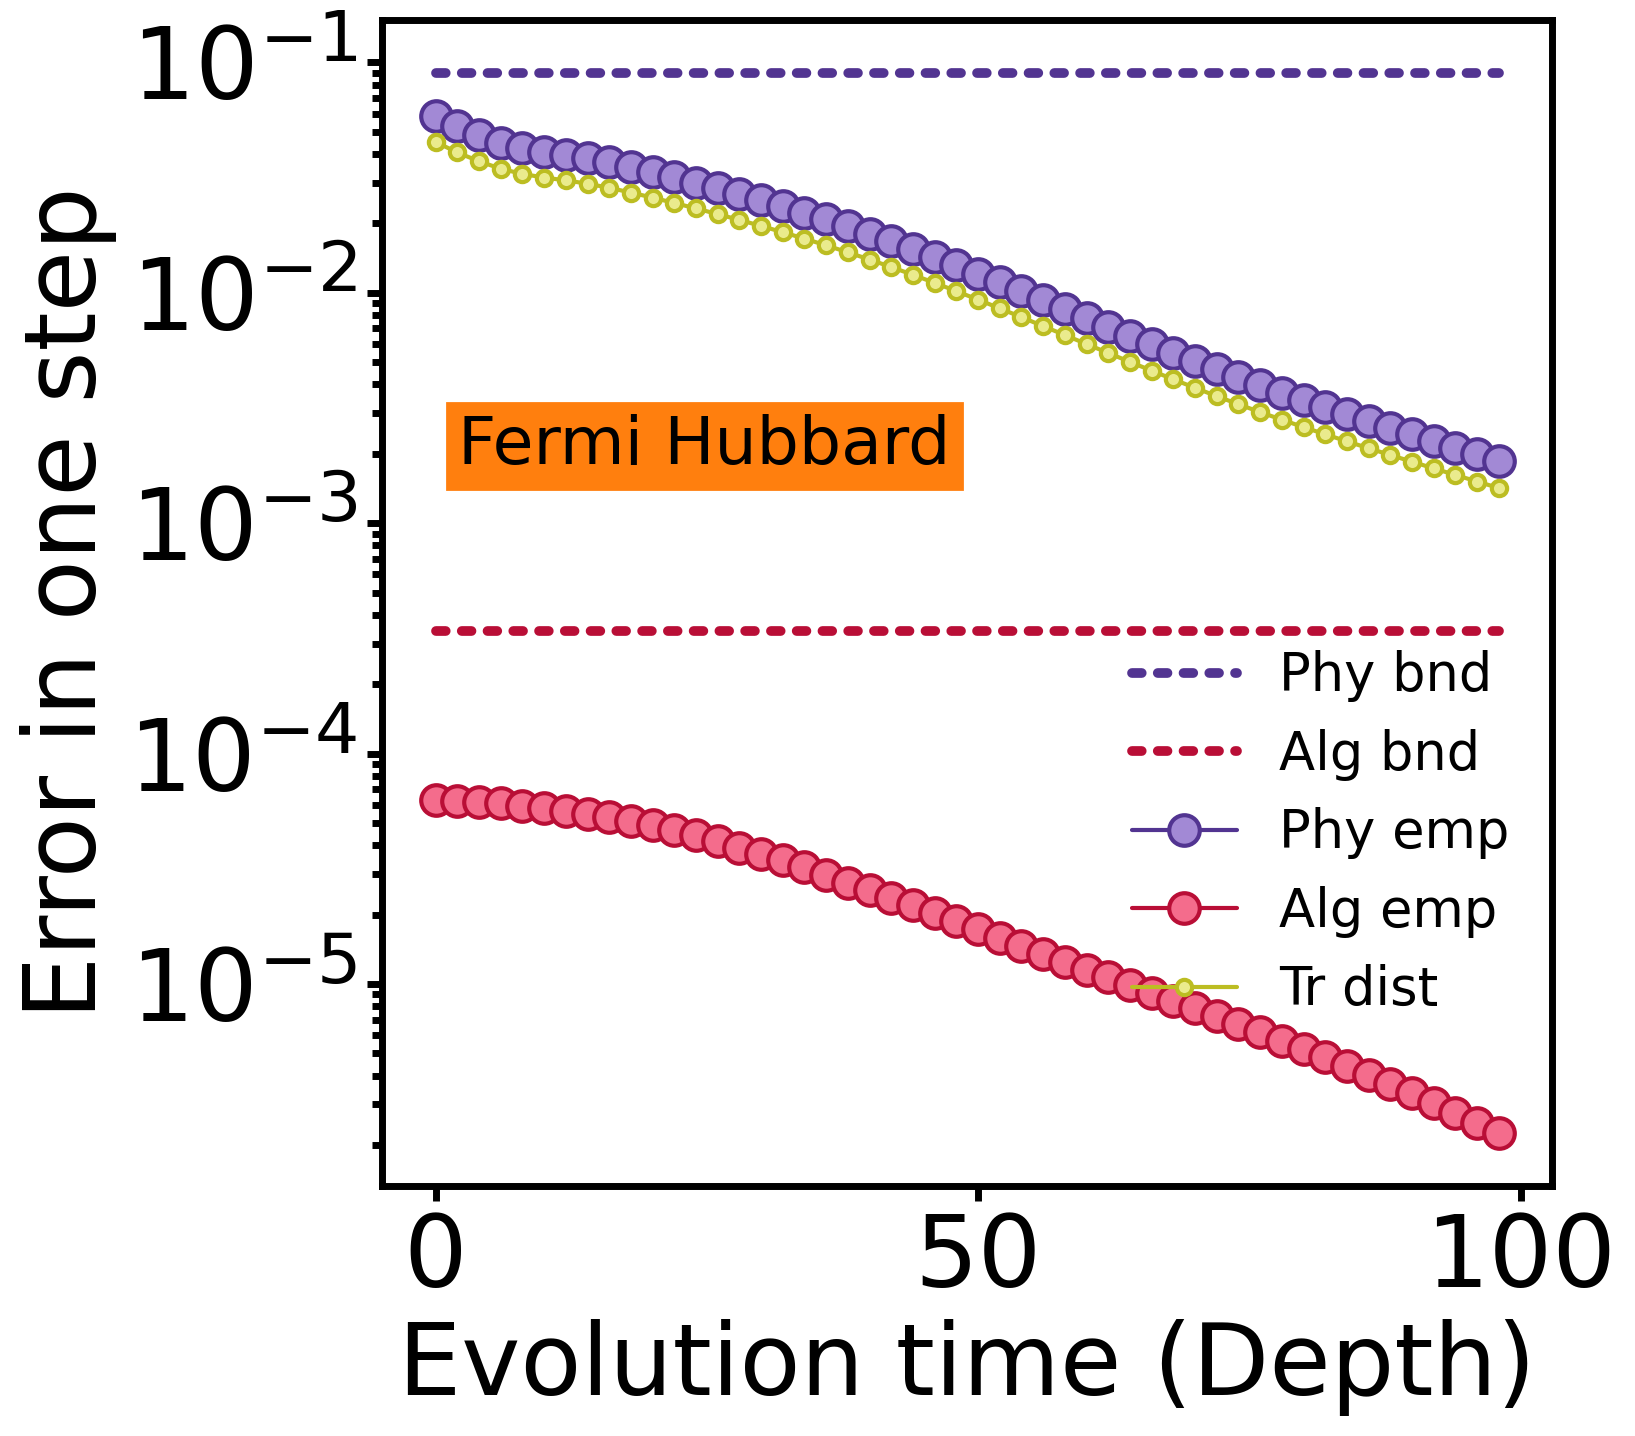

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))

n = 10
r = 100
# model = 'hydrogen_chain'
model = 'fermi_hubbard'
# model = 'power_law'

data_plot = np.load(f'./data/physical_models_n={n}.npy', allow_pickle=True).item()[model]

lw_wide = 3.5

gc = GradColors(10)
cm_phy, cm_alg, cm_tot = gc.purple, gc.red, gc.green

approx_color = [good_color_cycle[-2], good_color_cycle[4]]

gd_idx = 8

plot_num = 50
every_k_points = r // plot_num

width_0 = 1.5

phy_plot_color, alg_plot_color, tot_plot_color = cm_phy(gd_idx), cm_alg(gd_idx-1), cm_tot(gd_idx)

plot_evo(ax, np.arange(r)[::every_k_points], data_plot['phy_bnd'][::every_k_points], ':', label=f'Phy bnd', c=phy_plot_color, lw=lw_wide)

plot_evo(ax, np.arange(r)[::every_k_points], data_plot['alg_bnd'][::every_k_points], ':', label=f'Alg bnd', c=alg_plot_color, lw=lw_wide)

# plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(plus_data.phy_err_list[::every_k_points]), 'o-', label=f'Phy emp', c=phy_plot_color, lw=width_idx)
plot_evo(ax, np.arange(r)[::every_k_points], data_plot['phy'][::every_k_points], 'o-', label=f'Phy emp', c=phy_plot_color, lw=width_0)
plot_evo(ax, np.arange(r)[::every_k_points], data_plot['alg'][::every_k_points], 'o-', label=f'Alg emp', c=alg_plot_color, lw=width_0)
plot_evo(ax, np.arange(r)[::every_k_points], data_plot['tr_dist'][::every_k_points], '.-', label=f'Tr dist', c=approx_color[0], lw=width_0)

ax.set_yscale('log')

ax.set_xlabel(r'Evolution time (Depth)')
ax.set_ylabel(r'Error in one step')
ax.legend(loc='upper left', bbox_to_anchor=(0.6, 0.5))

fig.text(0.3, 0.65, 'Fermi Hubbard', color='black', bbox=dict(facecolor=good_color_cycle[4], alpha=1, edgecolor=good_color_cycle[4]), fontsize=LARGE_SIZE, ha='left', va='bottom')
# fig.text(0.3, 0.65, 'Hydrogen Chain', color='black', bbox=dict(facecolor=good_color_cycle[4], alpha=1, edgecolor=good_color_cycle[4]), fontsize=LARGE_SIZE, ha='left', va='bottom')
# fig.text(0.3, 0.45, 'Power Law', color='black', bbox=dict(facecolor=good_color_cycle[4], alpha=1, edgecolor=good_color_cycle[4]), fontsize=LARGE_SIZE, ha='left', va='bottom')

fig.savefig(f'{fig_dir}/decay_plot_{model}_n={n}.pdf', bbox_inches='tight')

In [14]:
# fig.savefig('./figs/decay_plot_fermi_hubbard.pdf', bbox_inches='tight')
# fig.savefig('./figs/decay_plot_hydrogen.pdf', bbox_inches='tight')
# fig.savefig(f'{fig_dir}/decay_plot_{model}_n={n}.pdf', bbox_inches='tight')
fig.savefig(f'{fig_dir}/decay_plot_power.pdf', bbox_inches='tight')

idx: 0
one_body_terms: 
 [-1.0 [0^ 2] +
-1.0 [2^ 0], -1.0 [1^ 3] +
-1.0 [3^ 1], -1.0 [2^ 4] +
-1.0 [4^ 2], -1.0 [3^ 5] +
-1.0 [5^ 3]]
one_body_L:  4
one_body[0]: 
   (4, 1)	(-1+0j)
  (6, 3)	(1+0j)
  (1, 4)	(-1+0j)
  (3, 6)	(1+0j)
c1=7.20526752916779, c2=16.12886906759315
naive_alg_bnd: 0.00015905939648921217
idx: 1
# pstr: 62, ['IIIIII', 'ZIIIII', 'YZZZYI', 'XZZZXI', 'IZIIII', 'IYZZZY', 'IXZZZX', 'IIZIII', 'IIIZII', 'IIIIZI', 'IIIIIZ', 'ZZIIII', 'YIZZYI', 'XIZZXI', 'YXXYII', 'YYXXII', 'XXYYII', 'XYYXII', 'ZYZZZY', 'ZXZZZX', 'YXIIXY', 'YYIIXX', 'XXIIYY', 'XYIIYX', 'ZIZIII', 'YZIZYI', 'XZIZXI', 'ZIIZII', 'YZZIYI', 'XZZIXI', 'YZYYZY', 'YZYXZX', 'XZXYZY', 'XZXXZX', 'ZIIIZI', 'ZIIIIZ', 'YZZZYZ', 'XZZZXZ', 'IZZIII', 'IYIZZY', 'IXIZZX', 'IYXXYI', 'IYYXXI', 'IXXYYI', 'IXYYXI', 'IZIZII', 'IYZIZY', 'IXZIZX', 'IZIIZI', 'IYZZIY', 'IXZZIX', 'IZIIIZ', 'IIZZII', 'IIYXXY', 'IIYYXX', 'IIXXYY', 'IIXYYX', 'IIZIZI', 'IIZIIZ', 'IIIZZI', 'IIIZIZ', 'IIIIZZ']
# groups 7
c1=0.2112142987385643, c2=0.29988562782

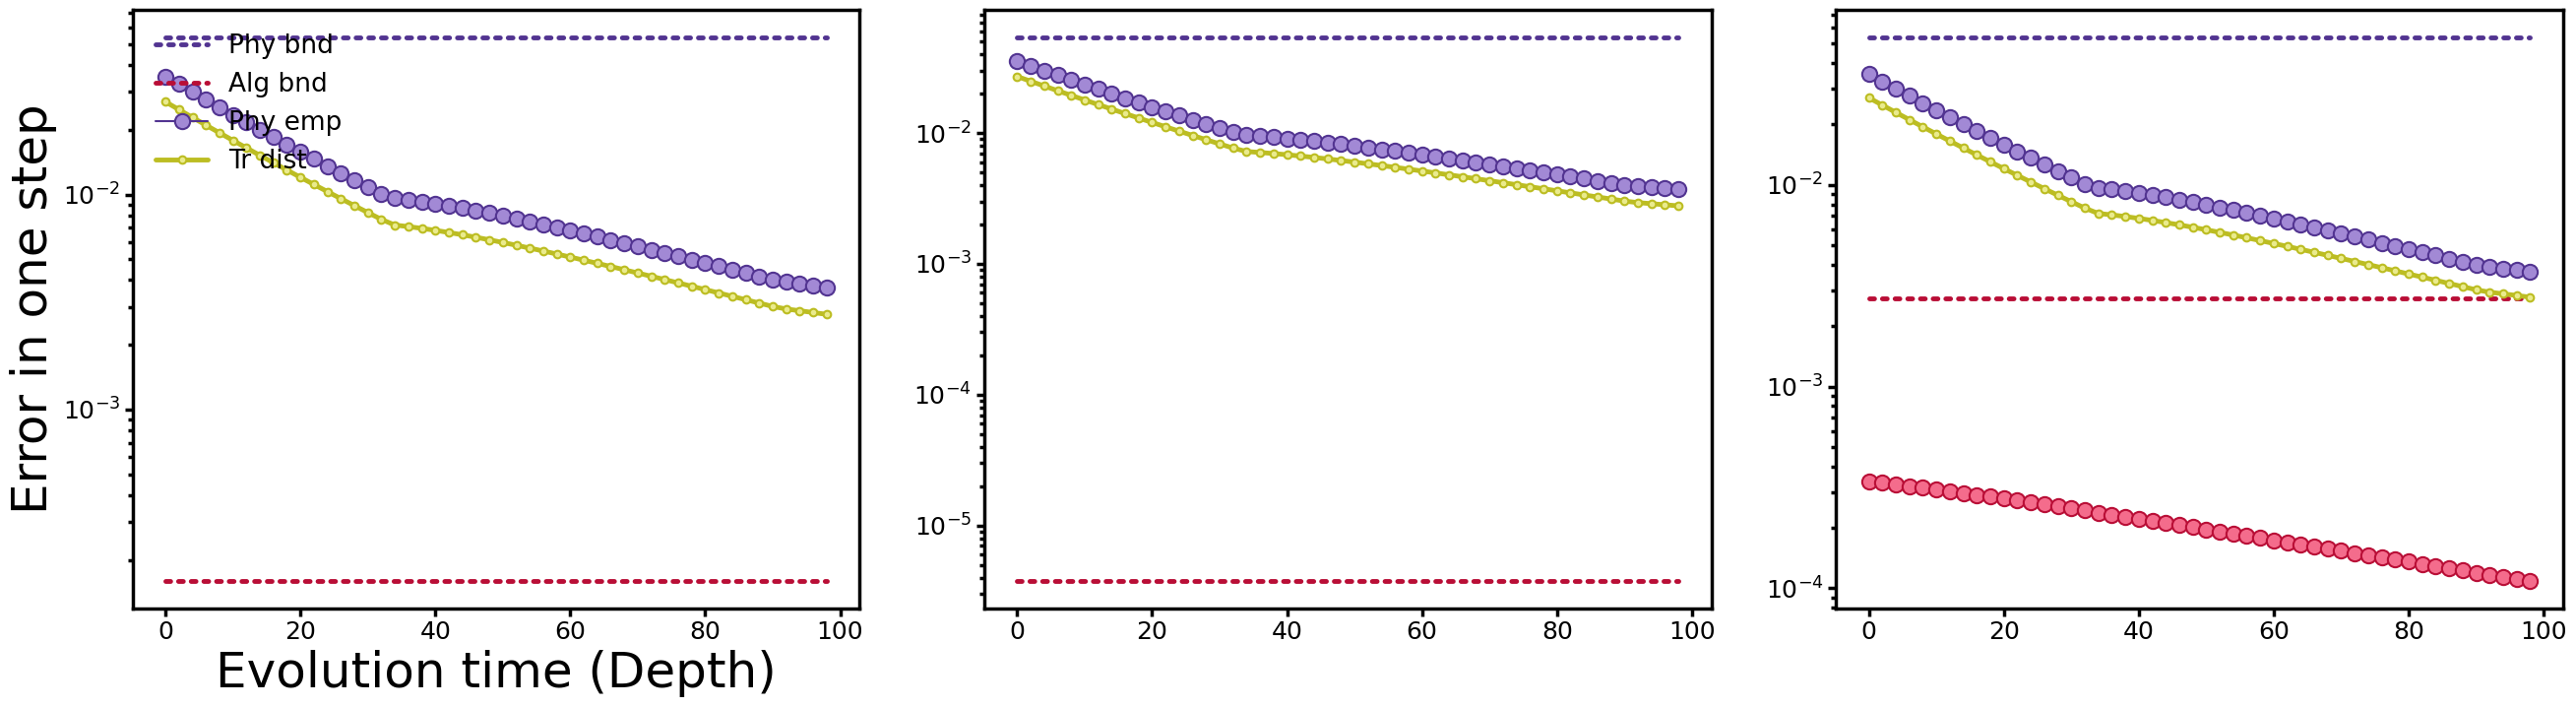

In [79]:
# plot_together

# model = 'nnh'
# model = 'fermi_hubbard'
# model = 'hydrogen_chain'
# model = 'power_law'
prefix = 'data'
# dirname = model
plot_idx = [{'type': 'fermi_hubbard', 'filetime': 'Y2024M10D18_h20m15s14', 'tag': 'Fermi Hubbard'},
            {'type': 'hydrogen_chain', 'filetime': 'Y2024M10D18_h20m22s38', 'tag': 'Hydrogen Chain'},
            {'type': 'power_law', 'filetime': 'Y2024M10D18_h20m16s48', 'tag': 'Power Law'}]

# filetimes = ['Y2024M10D18_h20m15s14']
# filetimes = ['Y2024M10D18_h20m22s38']
# filetimes = ['Y2024M10D18_h20m16s48']
width_0 = 1.5
fig, ax = plt.subplots(1, 3, figsize=(27, 8))

gc = GradColors(10)
cm_phy, cm_alg, cm_tot = gc.purple, gc.red, gc.green

gd_idx = 8

phy_plot_color, alg_plot_color, tot_plot_color = cm_phy(gd_idx), cm_alg(gd_idx-1), cm_tot(gd_idx)

# approx_color = '#6CA3D9DD'
# approx_color = "#75CD7AFF"
approx_color = [good_color_cycle[-2], good_color_cycle[4]]

lw_wide = 3.5

for idx, plot_info in enumerate(plot_idx):
    print('idx:', idx)

    width_idx = width_0 + 0.5 * idx

    model = plot_info['type']
    filetime = plot_info['filetime']
    dirname = plot_info['type']

    file_path = './' + prefix + '/' + dirname
    filename = file_path + f'/Error_00_{filetime}.txt'

    title, description, metadata, dict_data = read_dict(filename)

    plot_title = f"{description}"

    n = int(metadata['n'])
    p = float(metadata['p'])
    t = float(metadata['t'])
    r = int(metadata['r'])

    plot_num = 50
    every_k_points = r // plot_num

    if model == 'nnh':
        Jz = float(metadata['Jz'])
        hx = float(metadata['hx'])
        pbc = metadata['pbc'] == 'True'
        nnh = Nearest_Neighbour_1d(n=n, Jz=Jz, hx=hx, pbc=pbc)
        h_list = [H.to_matrix() for H in nnh.ham_xyz]
    
    elif model == 'fermi_hubbard':
        U = float(metadata['U'])
        hubbard = hubbard_openfermion(n//2, U=U, verbose=True)
        h_list = [sum(hubbard.one_body_01_sparse), sum(hubbard.one_body_23_sparse), sum(hubbard.two_body_sparse)]
        
    elif model == 'hydrogen_chain':
            chain_length = int(metadata['chain_length'])
            bond_length = float(metadata['bond_length'])
            hc = Hydrogen_Chain(chain_length=chain_length, bond_length=bond_length)
            # h_list = [term.toarray() for term in hc.h_group]
            h_list = [term.to_matrix() for term in hc.h_group]

    elif model == 'power_law':
        alpha = float(metadata['alpha'])
        hz = float(metadata['hz'])
        pl = Power_Law(n=n, alpha=alpha, hz=hz, Jx=1, Jy=1, Jz=1)
        h_list = [H.to_matrix() for H in pl.ham_xyz]

    naive_alg_bnd = tight_bound(h_list, 2, t/r, 1, verbose=True)
    print(f'naive_alg_bnd: {naive_alg_bnd}')

    acc_tot_err_list = [float(dict_data['tot'][0])]
    for i in range(1, len(dict_data['tot'])):
        acc_tot_err_list.append(float(dict_data['tot'][i]) + acc_tot_err_list[-1])
    # plot naive bound
    plot_evo(ax[idx], np.arange(r)[::every_k_points], [n * p]*plot_num, ':', label=f'Phy bnd', c=phy_plot_color, lw=lw_wide)
    # plot naive alg bnd
    plot_evo(ax[idx], np.arange(r)[::every_k_points], [naive_alg_bnd]*plot_num, ':', label=f'Alg bnd', c=alg_plot_color, lw=lw_wide)

    plot_evo(ax[idx], np.arange(r)[::every_k_points], 0.5*np.array(dict_data['phy'][::every_k_points]), 'o-', label=f'Phy emp', c=phy_plot_color, lw=width_idx)
    if model != 'fermi_hubbard' and model != 'hydrogen_chain':
        plot_evo(ax[idx], np.arange(r)[::every_k_points], 0.5*np.array(dict_data['alg'][::every_k_points]), 'o-', label=f'Alg emp', c=alg_plot_color, lw=width_idx)
    # plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['tot'][::every_k_points]), 'o-', label=f'Tot emp', c=tot_plot_color, lw=width_idx)
    # plot new bound
    # plot_evo(ax, np.arange(r)[::every_k_points], 0.5*np.array(dict_data['2'][::every_k_points]), '.-', label=f'Entropy', c=approx_color[1], lw=lw_wide)
    plot_evo(ax[idx], np.arange(r)[::every_k_points], 0.5*np.array(dict_data['1'][::every_k_points]), '.-', label=f'Tr dist', c=approx_color[0], lw=lw_wide)

    # ax.set_title(plot_title)
    # ax_set_text(ax[idx], r'Evolution time $t$ (Depth)', 'Error in one step', log='y')
    ax[idx].set_yscale('log')
    # ax[idx].set_xlabel(r'Evolution time (Depth)', fontweight='bold')
    # ax[idx].set_ylabel(r'Error in one step', fontweight='bold')
    if idx == 0:
        ax[idx].set_xlabel(r'Evolution time (Depth)')
        ax[idx].set_ylabel(r'Error in one step')
        # ax[idx].legend(loc='upper left', bbox_to_anchor=(0.6, 0.5))
        ax[idx].legend(loc='upper left')
    # ax.text(1, 1e-5, 'Hydrogen\nChain', color=good_color_cycle[3], bbox=dict(facecolor=good_color_cycle[4], alpha=0.5, edgecolor=good_color_cycle[1]), fontsize=LARGE_SIZE)
    # fig.text(0.3, 0.3, 'Hydrogen Chain', color='black', bbox=dict(facecolor=good_color_cycle[4], alpha=1, edgecolor=good_color_cycle[4]), fontsize=LARGE_SIZE, ha='left', va='bottom')
    # fig.text(0.3, 0.3, 'Fermi Hubbard', color='black', bbox=dict(facecolor=good_color_cycle[4], alpha=1, edgecolor=good_color_cycle[4]), fontsize=LARGE_SIZE, ha='left', va='bottom')
    # fig.text(0.3, 0.45, 'Power Law', color='black', bbox=dict(facecolor=good_color_cycle[4], alpha=1, edgecolor=good_color_cycle[4]), fontsize=LARGE_SIZE, ha='left', va='bottom')
fig.savefig('./figs/decay_plot_physical_models.pdf', bbox_inches='tight')
plt.show()

In [ ]:
from plot_data import read_dict
from quantum_simulation_recipe.plot_config import *
from quantum_simulation_recipe.bounds import tight_bound
from quantum_simulation_recipe.spin import Nearest_Neighbour_1d, Power_Law
from quantum_simulation_recipe.fermion import Hydrogen_Chain, hubbard_openfermion

In [18]:
model = 'fermi_hubbard'
filetimes = ['Y2024M10D18_h20m15s14']
for idx, filetime in enumerate(filetimes):
    filename = './data/fermi_hubbard/' + filetime + '.txt'
    title, description, metadata, dict_data = read_dict(filename)
    n = int(metadata['n'])
    p = float(metadata['p'])
    t = float(metadata['t'])
    r = int(metadata['r'])

    plot_num = 50
    every_k_points = r // plot_num

    if model == 'fermi_hubbard':
        U = float(metadata['U'])
        hubbard = hubbard_openfermion(n=n, U=U, verbose=True)
        h_list = [sum(hubbard.one_body_01_sparse), sum(hubbard.one_body_23_sparse), sum(hubbard.two_body_sparse)]
        
    elif model == 'hydrogen_chain':
            chain_length = int(metadata['chain_length'])
            bond_length = float(metadata['bond_length'])
            hc = Hydrogen_Chain(chain_length=chain_length, bond_length=bond_length)
            h_list = [term.toarray() for term in hc.h_group]

    elif model == 'power_law':
        alpha = float(metadata['alpha'])
        hz = float(metadata['hz'])
        pl = Power_Law(n=n, alpha=alpha, hz=hz)
        h_list = [H.to_matrix() for H in pl.ham_xyz]
    
    naive_alg_bnd = tight_bound(h_list, 2, t/r, 1, verbose=True)

FileNotFoundError: [Errno 2] No such file or directory: './data/fermi_hubbard/Y2024M10D18_h20m15s14.txt'

## Hamiltonians Plot New

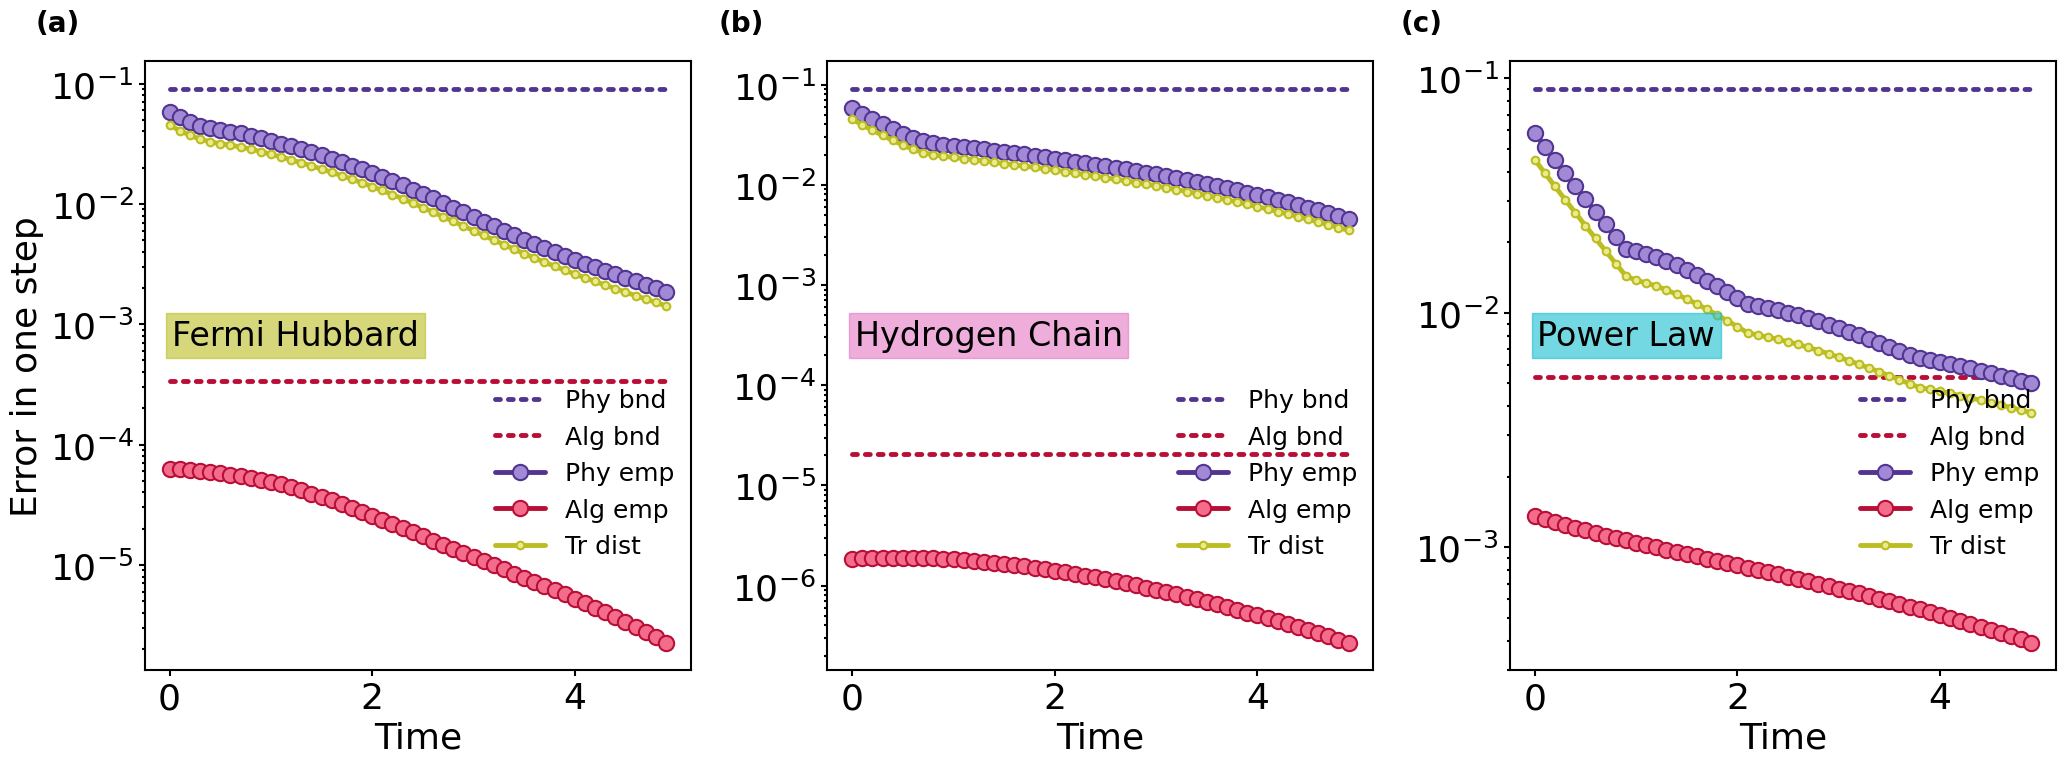

In [17]:
from quantum_simulation_recipe.plot_config import *

good_color_cycle = ['#9467bdFF', '#2ca02cFF', '#d62728FF', '#1f77b4FF', '#ff7f0eFF', '#8c564bFF', '#e377c2FF', '#7f7f7fFF', '#bcbd22FF', '#17becfFF']
set_color_cycle(good_color_cycle)
set_fontsize(medium=MEDIUM_SIZE, large=LARGE_SIZE+2, linewidth=1.5)

plt.rc('legend', fontsize=MEDIUM_SIZE) 

mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['axes.grid'] = False
mpl.rcParams['font.family'] = 'sans-serif'  
mpl.rcParams['legend.frameon'] = False

fig, ax = plt.subplots(1, 3, figsize=(21, 8))

n = 10
t = 5
r = 100
# model = 'hydrogen_chain'
# model = 'fermi_hubbard'
# model = 'power_law'
model_list = ['fermi_hubbard', 'hydrogen_chain', 'power_law']
tag_list = ['Fermi Hubbard', 'Hydrogen Chain', 'Power Law']
tag_colors = ['#bcbd22FF', '#e377c2FF', '#17becfFF']

data_all = np.load(f'./data/physical_models_n={n}.npy', allow_pickle=True).item()

lw_wide = 3.5


approx_color = [good_color_cycle[-2], good_color_cycle[4]]

gd_idx = 8
gc = GradColors(10)
cm_phy, cm_alg, cm_tot = gc.purple, gc.red, gc.green

plot_num = 50
every_k_points = r // plot_num

width_0 = 1.5
width_0 = lw_wide

t_list = np.arange(r) * t/r

phy_plot_color, alg_plot_color, tot_plot_color = cm_phy(gd_idx), cm_alg(gd_idx-1), cm_tot(gd_idx)

for i, model_name in enumerate(model_list):

    data_plot = data_all[model_name]

    plot_evo(ax[i], t_list[::every_k_points], data_plot['phy_bnd'][::every_k_points], ':', label=f'Phy bnd', c=phy_plot_color, lw=lw_wide)

    plot_evo(ax[i], t_list[::every_k_points], data_plot['alg_bnd'][::every_k_points], ':', label=f'Alg bnd', c=alg_plot_color, lw=lw_wide)

    # plot_evo(ax[i], t_list[::every_k_points], 0.5*np.array(plus_data.phy_err_list[::every_k_points]), 'o-', label=f'Phy emp', c=phy_plot_color, lw=width_idx)
    plot_evo(ax[i], t_list[::every_k_points], data_plot['phy'][::every_k_points], 'o-', label=f'Phy emp', c=phy_plot_color, lw=width_0)
    plot_evo(ax[i], t_list[::every_k_points], data_plot['alg'][::every_k_points], 'o-', label=f'Alg emp', c=alg_plot_color, lw=width_0)
    plot_evo(ax[i], t_list[::every_k_points], data_plot['tr_dist'][::every_k_points], '.-', label=f'Tr dist', c=approx_color[0], lw=width_0)

    ax[i].set_yscale('log')

    ax[i].legend(loc='upper left', bbox_to_anchor=(0.6, 0.5))
    # ax[i].legend(loc='lower left')

    bbox_props = dict(facecolor=tag_colors[i], alpha=.6, edgecolor=tag_colors[i])

    # ax[i].text(0.3, 0.65, tag_list[i], color='black', bbox=dict(facecolor=tag_colors[i], alpha=.6, edgecolor=tag_colors[i]), fontsize=LARGE_SIZE, ha='left', va='bottom')

    ax[i].annotate(tag_list[i], xy=(0.05, 0.55), xycoords='axes fraction', fontsize=LARGE_SIZE, ha='left', va='center', bbox=bbox_props)
    ax[i].text(-.2, 1.05, ['(a)', '(b)', '(c)'][i], size=20, transform=ax[i].transAxes, weight='bold')

    ax[i].set_xlabel(r'Time')

ax[0].set_ylabel(r'Error in one step')

# letter_annotation(ax, -.2, 1.1, ['a', 'b', 'c'], fontsize=20)

fig.savefig(f'figs/decay_plot_n={n}.pdf', bbox_inches='tight')